1419
3846                           
12822                                                                                                                  
14127               
15291                


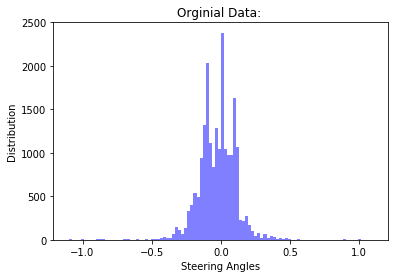


40709
 Loading Done


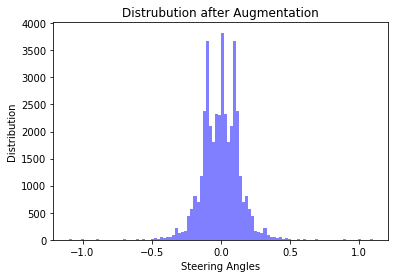

In [3]:
import cv2
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import sklearn
# import tensorflow as tf
from sklearn.model_selection import train_test_split


correction = 0.1 #  0.25 parameter to tune
del_rate =  0.2 # 0.4 0.8
del_rate2  = 1.0
cut_value = .01   # 0.02  0.5

def RandomBrightness(image):
    # convert to HSV 
    RandomImage = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    # randomly generate brightness value
    # define range dark to bright
    random_bright = np.random.uniform(0.25,1.0)
    # Apply the brightness to V channel
    RandomImage[:,:,2] = RandomImage[:,:,2]*random_bright
    # back to RGB
    RandomImage = cv2.cvtColor(RandomImage,cv2.COLOR_HSV2RGB)
    return RandomImage

lines = []
lines1 = []
lines2 = []
lines3 = []
lines4 = []
lines5 = []
meaurements = []
# read counter clockwise data run
with open('./data/data12/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)        
with open('./data/data13/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines1.append(line)
        
with open('./data/data14/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines2.append(line)
        
with open('./data/data15/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines3.append(line)    

with open('./data/data16/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines4.append(line)  

with open('./data/data17/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines5.append(line) 
        
images = []
measurements = []
count = 0
for line in lines:
    for i in range(3):
       
        source_path = line[i]   # read the middle, left, right images limit 2^15
        source_path=source_path.replace("\\","/")
        filename = source_path.split('/')[-1]
        count +=1
        print(count,end="\r",)
        current_path='./data/data12/IMG/' + filename
        image = cv2.imread(current_path)
        images.append(image)
        
        measurement = float(line[3])
        # Center CAM
        if i == 0 :
            measurements.append(measurement)
        # Left CAM
        elif i == 1 :
            measurements.append(measurement+correction)
        #  Right CAM    
        else:
            measurements.append(measurement-correction)   
print("")      
for line in lines1:
    for i in range(3):
        source_path = line[i]   # read the middle, left, right images
        source_path=source_path.replace("\\","/")
        filename = source_path.split('/')[-1]
        count +=1
        print(count,end=" \r",)
        current_path='./data/data13/IMG/' + filename  
        image = cv2.imread(current_path)
        images.append(image)
        measurement = float(line[3])
        # Center CAM
        if i == 0 :
            measurements.append(measurement)
        # Left CAM  
        elif i == 1 :    
            measurements.append(measurement+correction)
        #  Right CAM   
        else:    
            measurements.append(measurement-correction)
    
print("")      
for line in lines2:
    for i in range(3):
        source_path = line[i]   # read the middle, left, right images
        source_path=source_path.replace("\\","/")
        filename = source_path.split('/')[-1]
        count +=1
        print(count,end=" \r",)
        current_path='./data/data14/IMG/' + filename
        image = cv2.imread(current_path)
        images.append(image)
        measurement = float(line[3])
        # Center CAM
        if i == 0 :
            measurements.append(measurement)
        # Left CAM
        elif i == 1 :    
            measurements.append(measurement+correction)
        #  right CAM    
        else:
            measurements.append(measurement-correction)    

            
print("")      
for line in lines3:
    for i in range(3):
        source_path = line[i]   # read the middle, left, right images
        source_path=source_path.replace("\\","/")
        filename = source_path.split('/')[-1]
        count +=1
        print(count,end=" \r",)
        current_path='./data/data15/IMG/' + filename
        image = cv2.imread(current_path)
        images.append(image)
        measurement = float(line[3])
        # Center CAM
        if i == 0 :
            measurements.append(measurement)
        # Left CAM
        elif i == 1 :    
            measurements.append(measurement+correction)
        #  right CAM    
        else:
            measurements.append(measurement-correction)
            
print("")      
for line in lines4:
    for i in range(3):
        source_path = line[i]   # read the middle, left, right images
        source_path=source_path.replace("\\","/")
        filename = source_path.split('/')[-1]
        count +=1
        print(count,end=" \r",)
        current_path='./data/data16/IMG/' + filename
        image = cv2.imread(current_path)
        images.append(image)
        measurement = float(line[3])
        # Center CAM
        if i == 0 :
            measurements.append(measurement)
        # Left CAM
        elif i == 1 :    
            measurements.append(measurement+correction)
        #  right CAM    
        else:
            measurements.append(measurement-correction)            
print("")
       
for line in lines5:
    for i in range(3):
        source_path = line[i]   # read the middle, left, right images
        source_path=source_path.replace("\\","/")
        filename = source_path.split('/')[-1]
        count +=1
        print(count,end=" \r",)
        current_path='./data/data17/IMG/' + filename
        image = cv2.imread(current_path)
        images.append(image)
        measurement = float(line[3])
        # Center CAM
        if i == 0 :
            measurements.append(measurement)
        # Left CAM
        elif i == 1 :    
            measurements.append(measurement+correction)
        #  right CAM    
        else:
            measurements.append(measurement-correction)
            
            
augment_images, augmented_measurements = [],[]

#Histogram before balanced steering angle
num_bins = 100
n, bins, patches = plt.hist(measurements, num_bins,facecolor='blue', alpha=0.5)
plt.xlabel('Steering Angles')
plt.ylabel('Distribution')
plt.title('Orginial Data: ' )
plt.show()
print("")
for image,measurement in zip(images, measurements):
    if abs(measurement) > cut_value or np.random.random() > del_rate:
        image = RandomBrightness(image) # random brightness
        count +=1
        print(count,end="\r",)
        augment_images.append(image)
        augmented_measurements.append(measurement)
        augment_images.append(cv2.flip(image,1))
        augmented_measurements.append(measurement*-1.0)

print("") 
 # training   limit  2^16
X_train = np.array(augment_images)   
y_train = np.array(augmented_measurements)   

print(" Loading Done")



num_bins = 100
n, bins, patches = plt.hist(augmented_measurements, num_bins,facecolor='blue', alpha=0.5)
plt.xlabel('Steering Angles')
plt.ylabel('Distribution')
plt.title('Distrubution after Augmentation')
plt.show()
 


In [4]:
# NEW  reminder update model name if cut rate is acceptable!!!!!!!!!!!!!!!!!!!!!!

import tensorflow as tf
print(tf.__version__)
print("")

import keras

from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Lambda, Dropout, Activation,ELU
from keras.layers.convolutional import Conv2D, Cropping2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import Adam
from keras.models import load_model
#from keras.utils.visualize_util import plot
from keras.utils import plot_model
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

def resize(img):
    import tensorflow
    return tensorflow.image.resize_images(img,(60,120))

# network
model = Sequential()

# Crop 70 pixels from the top of the image and 25 from the bottom
model.add(Cropping2D(cropping=((75, 25), (0, 0)),
                     input_shape=(160, 320, 3),
                     data_format="channels_last"))

# Resize the data
model.add(Lambda(resize))

# Normalize the data
model.add(Lambda(lambda x: (x/127.5) - 0.5))

model.add(Conv2D(3, (1, 1), padding='same'))
model.add(ELU())

model.add(BatchNormalization())
model.add(Conv2D(16, (5, 5), strides=(2, 2), padding="same"))
model.add(ELU())

model.add(BatchNormalization())
model.add(Conv2D(32, (5, 5), strides=(2, 2), padding="same"))
model.add(ELU())

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), strides=(2, 2), padding="same"))
model.add(ELU())

model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), strides=(2, 2), padding="same"))
model.add(ELU())

model.add(Flatten())
model.add(ELU())

model.add(Dense(512))
model.add(Dropout(.2))
model.add(ELU())

model.add(Dense(100))
model.add(Dropout(.5))
model.add(ELU())

model.add(Dense(10))
model.add(Dropout(.5))
model.add(ELU())

model.add(Dense(1))

adam = Adam(lr=1e-5)
model.compile(loss = 'mse',optimizer = 'adam',metrics =['accuracy']) #



1.13.1



Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
earlystopper = EarlyStopping(patience =5, verbose =1)
checkpointer = ModelCheckpoint('model3_new_M11a_11a_E50_r1_2.h5', monitor ='val_loss',verbose=1,save_best_only=True)

hist_obj = model.fit(X_train, y_train, validation_split = 0.2, shuffle = True, epochs = 20)
model.save('model3_new_RND_0p1_M11a_10a_E20_r3_2.h5')
    
model.summary()          
print(model.summary())

Train on 22016 samples, validate on 5504 samples
Epoch 1/20
22016/22016 [==============================] - 53s 2ms/step - loss: 0.6751 - acc: 0.0281 - val_loss: 0.2551 - val_acc: 0.0598
Epoch 2/20
22016/22016 [==============================] - 44s 2ms/step - loss: 0.1082 - acc: 0.0463 - val_loss: 0.1291 - val_acc: 0.0767
Epoch 3/20
22016/22016 [==============================] - 43s 2ms/step - loss: 0.0471 - acc: 0.0516 - val_loss: 0.0739 - val_acc: 0.0767
Epoch 4/20
22016/22016 [==============================] - 44s 2ms/step - loss: 0.0258 - acc: 0.0518 - val_loss: 0.0351 - val_acc: 0.0767
Epoch 5/20
22016/22016 [==============================] - 44s 2ms/step - loss: 0.0176 - acc: 0.0519 - val_loss: 0.0173 - val_acc: 0.0767
Epoch 6/20
22016/22016 [==============================] - 44s 2ms/step - loss: 0.0149 - acc: 0.0519 - val_loss: 0.0136 - val_acc: 0.0767
Epoch 7/20
22016/22016 [==============================] - 43s 2ms/step - loss: 0.0136 - acc: 0.0519 - val_loss: 0.0124 - val_acc:

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


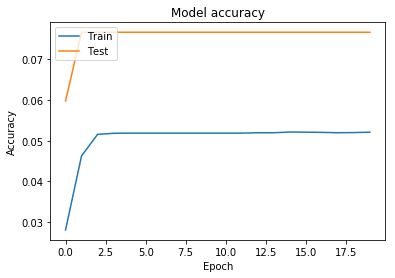

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_2 (Cropping2D)    (None, 60, 320, 3)        0         
_________________________________________________________________
lambda_3 (Lambda)            (None, 60, 120, 3)        0         
_________________________________________________________________
lambda_4 (Lambda)            (None, 60, 120, 3)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 120, 3)        12        
_________________________________________________________________
elu_10 (ELU)                 (None, 60, 120, 3)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 60, 120, 3)        12        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 60, 16)        1216      
__________

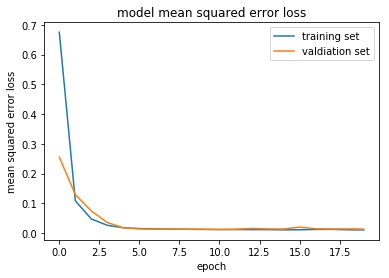

In [11]:
# plot/print some stuff
print(hist_obj.history.keys())

# Plot training & validation accuracy values
plt.plot(hist_obj.history['acc'])
plt.plot(hist_obj.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(hist_obj.history['loss'])
plt.plot(hist_obj.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'valdiation set'],loc='upper right')
plt.show

#Print model
print(model.summary())



#visualize the model
modelobj = load_model('model3_new_RND_0p1_M11a_10a_E20_r3_2.h5')
plot_model(modelobj, to_file='model3_new_RND_0p1_M11a_10a_E20_r3_2.png')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_2 (Cropping2D)    (None, 60, 320, 3)        0         
_________________________________________________________________
lambda_3 (Lambda)            (None, 60, 120, 3)        0         
_________________________________________________________________
lambda_4 (Lambda)            (None, 60, 120, 3)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 120, 3)        12        
_________________________________________________________________
elu_10 (ELU)                 (None, 60, 120, 3)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 60, 120, 3)        12        
_________________________________________________________________
conv2d_7 (Conv2D)         

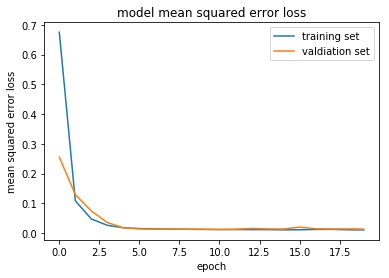

In [12]:
# plot/print some stuff
print(hist_obj.history.keys())

plt.plot(hist_obj.history['loss'])
plt.plot(hist_obj.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'valdiation set'],loc='upper right')
plt.show

print(model.summary())

modelobj = load_model('model3_new_RND_0p1_M11a_10a_E20_r3_2.h5')
plot_model(modelobj, to_file='model3_new_RND_0p1_M11a_10a_E20_r3_2.png', show_shapes=True, show_layer_names=True)

In [ ]:
# orginial model
model = Sequential()

# test 
#model.add(Flatten(input_shape=(160,320,3)))
#model.add(Dense(1))

# real model
# Normalize image
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape = (160, 320, 3)))
model.add(Cropping2D(cropping=((50,20), (0,0)), input_shape=(3,160,320)))
# Convolution Layer 1
model.add(Conv2D(24,(5,5), strides =(2,2)))
# Dropout
#model.add(Dropout(0.5))
# Activation Layer
model.add(Activation('elu'))
# Convolution Layer 2
model.add(Conv2D(36,(5,5), strides =(2,2)))
#model.add(Dropout(0.5))
model.add(Activation('elu'))
# Convolution Layer 3         
model.add(Conv2D(48,(5,5), strides =(2,2)))
#model.add(Dropout(0.5))
model.add(Activation('elu'))
# Convolution Layer 4         
model.add(Conv2D(64,(3,3), strides=(1,1)))
#model.add(Dropout(0.5))
model.add(Activation('elu'))
# Convolution Layer 5          
model.add(Conv2D(24,(3,3), strides=(1,1)))
#model.add(Dropout(0.5))
model.add(Activation('elu'))
#
#model.add(Dropout(0.4))
# Flatten to single 1-D array
model.add(Flatten())
#
model.add(Dropout(0.4))
# Fully connected Layer 1          
model.add(Dense(100))
# Fully connected Layer 2          
model.add(Dense(50))
# Fully connected Layer 3          
model.add(Dense(10))
 # fully connected Layer 4         
model.add(Dense(1))
